In [1]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(345, 640, 3)
(800, 1500, 3)


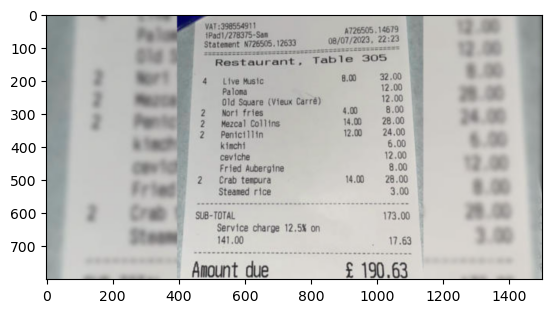

In [2]:
im_path = "./bill.jpg "
# read image from path
img = cv2.imread(im_path)

print(img.shape)

#image resize
img= cv2.resize(img,(1500,800))
#BGR format : BGR-
print(img.shape)

plt.imshow(img)
plt.show()


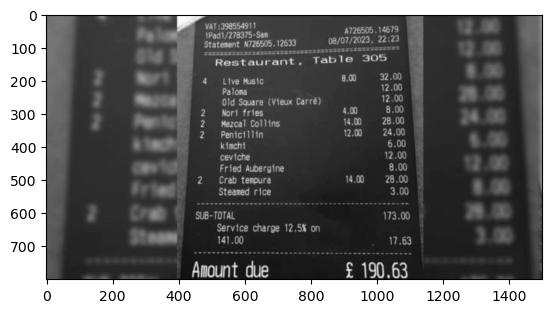

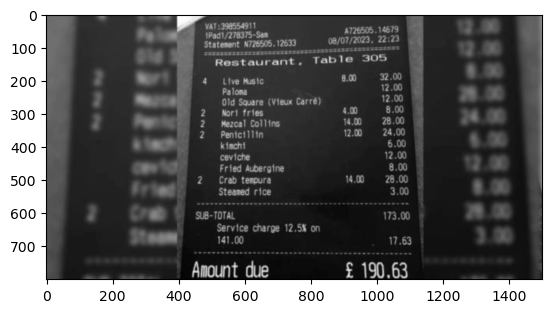

In [5]:
##Remove the Noise

##image blurring 

orig= img.copy()
gray= cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap= "binary")
plt.show()

blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred , cmap= "binary")
plt.show()

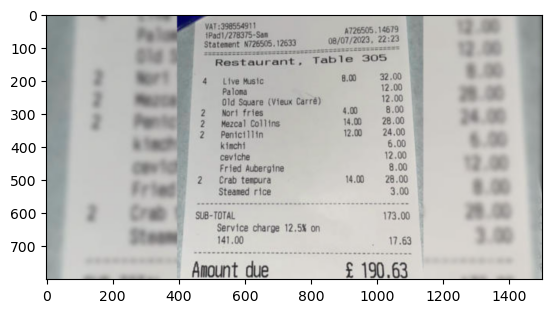

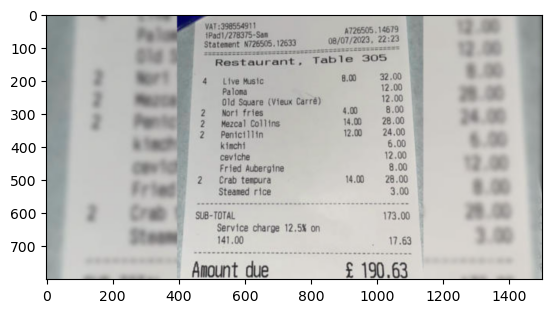

In [7]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(orig)
plt.show()


In [8]:
regen.shape

(800, 1500, 3)

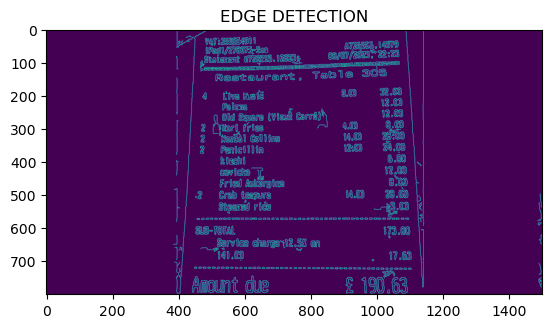

In [9]:
##Edge Deteection

edge= cv2.Canny(blurred, 0,50)
orig_edge= edge.copy()
plt.imshow(orig_edge)
plt.title("EDGE DETECTION")
plt.show()

In [10]:
##CONTOUR EXTRACTIONNONE

contours,_ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))



contours= sorted(contours, reverse= True, key= cv2.contourArea)

1369


In [11]:
##Select the best contour


for c in contours:
    p=cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    if len(approx)==4:
        target= approx
        break

print(target.shape)

(4, 1, 2)


In [12]:
##Reorder the target contour


def reorder(h):

    h= h.reshape((4,2))
    print(h)
    hnew= np.zeros((4,2), dtype = np.float32 )
    add=h.sum(axis = 1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]

    diff= np.diff(h,axis=1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]


    return hnew


    

In [13]:
reorder= reorder(target)
print("**********")
print(reorder)

[[1047  294]
 [1047  298]
 [1050  298]
 [1050  294]]
**********
[[1047.  298.]
 [1050.  298.]
 [1047.  298.]
 [1050.  298.]]


In [15]:
### Project to a fixed screen

input_representation = reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [16]:
M =  cv2.getPerspectiveTransform(input_representation, output_map)
ans = cv2.warpPerspective(orig, M, (800,800))

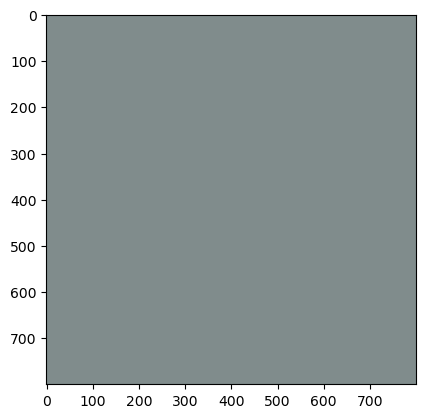

In [18]:
plt.imshow(ans)
plt.show()

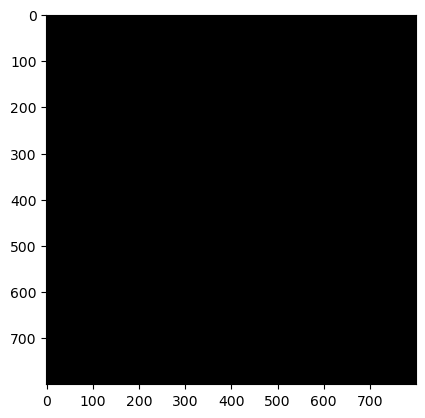

In [19]:
res = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)

b_res = cv2.GaussianBlur(res, (3,3)

plt.imshow(res, cmap = "gray")
plt.show()